#**Proyecto: Analizador de correos potencialmente peligrosos**

**Estudiante:** Marino Bastidas Rosero

**Curso:** Bootcamp en Ciberseguridad - Nivel Explorador

**Repositorio:** https://github.com/Bastidas24/phishing-detector.git

**Grabación:**

**Nota:** En el presente proyecto se uso el modelo de Claude Sonnet 4.0 como asistente de código

**Objetivo:** Desarrollar una herramienta automatizada en Python que analice correos electrónicos para detectar indicadores de phishing implementando un sistema de clasificación de riesgo que permita identificar amenazas potenciales y generar alertas.

#🏗️ Arquitectura del Sistema

_Diagrama de flujo.svg

#🛡️ Sistema Anti-Phishing

Sistema inteligente de detección de correos electrónicos de phishing desarrollado en Python con FastAPI, diseñado para integrarse con Make.com y desplegarse en Railway.

**🎯 Características Principales**
* Análisis Multimodal: Evaluación de remitente, URLs,
contenido de texto y archivos adjuntos.

* Autenticación de Email: Verificación SPF, DKIM y DMARC.

* Detección de URLs Maliciosas: Análisis de acortadores, typosquatting y dominios sospechosos.

* Análisis de Texto NLP: Procesamiento bilingüe (español/inglés) con TextBlob

* Scoring Inteligente: Sistema de puntuación balanceado con niveles de amenaza.

* API REST Completa: Documentación automática con FastAPI.

* Integración Make.com: Endpoint específico optimizado para webhooks.


**Flujo de Procesamiento**

1. Recepción: Correo recibido vía mailhook.

2. Redirección: Make.com envía datos al backend.

3. Análisis: Sistema evalúa múltiples indicadores.

4. Scoring: Cálculo de nivel de amenaza.

5. Respuesta: Recomendaciones y acciones sugeridas.

#🚀 Despliegue Rápido

**Requisitos**

* Python 3.11+

* Railway account

* Make.com account (opcional)

**Instalación Local**

In [ ]:
# Clonar repositorio
git clone <repository-url>
cd sistema-anti-phishing

# Crear entorno virtual
python -m venv venv
source venv/bin/activate  # Linux/Mac
# venv\Scripts\activate   # Windows

# Instalar dependencias
pip install -r requirements.txt

# Descargar datos NLTK
python -c "import nltk; nltk.download('punkt'); nltk.download('stopwords')"

# Configurar variables de entorno
cp .env.example .env
# Editar .env con tus configuraciones

# Ejecutar servidor
uvicorn app.main:app --reload

**Despliegue en Railway**

1. Conectar repositorio a Railway
2. Configurar variables de entorno

In [ ]:
LOG_LEVEL=INFO
MAX_EMAILS_PER_BATCH=50
RATE_LIMIT_PER_MINUTE=100

3. Desplegar automáticamente con el Dockerfile

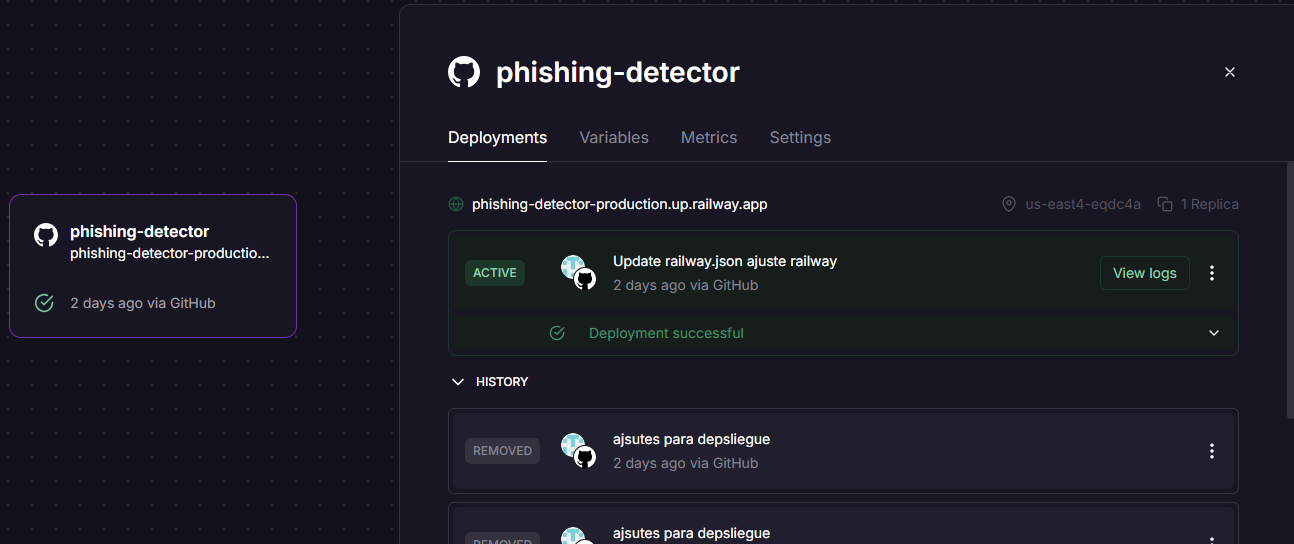

#📡 API Endpoints
**Principal para Make.com**

In [ ]:
POST /webhook/make

**Análisis Individual**

In [ ]:
POST /analyze

**Análisis por Lotes**

In [ ]:
POST /analyze/batch

**Health Check**

In [ ]:
GET /health

**Estadísticas**

In [ ]:
GET /stats

#📊 Ejemplo de Respuesta

In [ ]:
{
  "is_phishing": true,
  "threat_level": "high",
  "confidence_score": 0.82,
  "risk_summary": {
    "total_detections": 3,
    "high_risk_urls": 1,
    "sender_issues": true,
    "suspicious_content": true
  },
  "top_recommendations": [
    "🚨 NO abrir enlaces ni descargar archivos adjuntos",
    "📧 Verificar la identidad del remitente por otro medio",
    "🔍 Reportar este email como phishing"
  ],
  "recommended_action": "BLOCK_AND_ALERT"
}

#🛠️ Configuración con Make.com

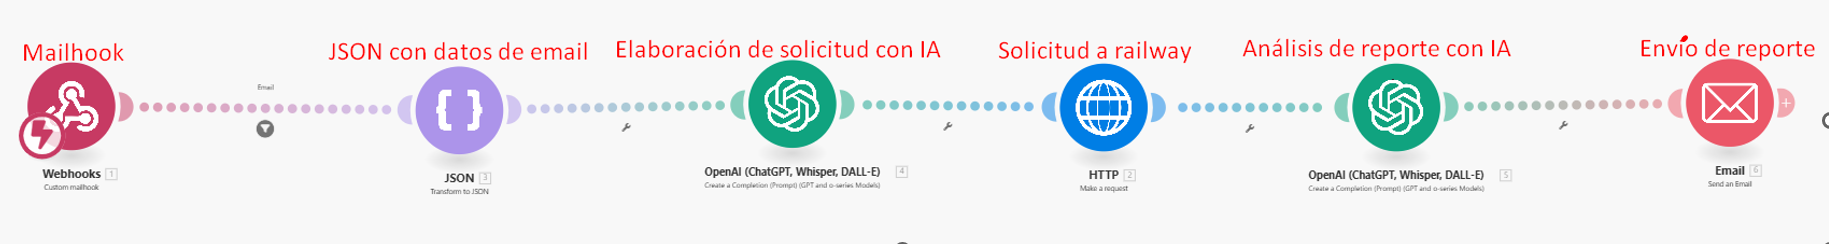

1. Crear nuevo escenario en Make.com
2. Configurar mailhook para recibir emails
3. Añadir módulo HTTP:
 * URL: https://tu-app.railway.app/webhook/make
 * Método: POST
 * Headers: Content-Type: application/json
4. Mapear campos del email a la estructura esperada
5. Configurar acciones basadas en recommended_action

#🔧 Configuración Avanzada

**Variables de Entorno**

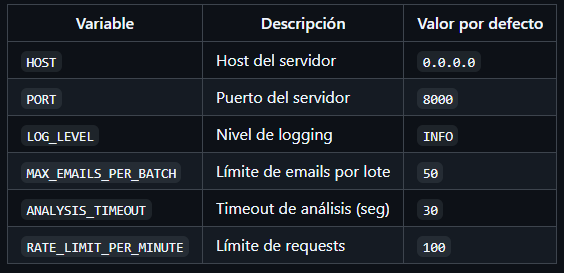

**Personalización de Scoring**
El sistema utiliza pesos configurables:

* Remitente: 35% (SPF/DKIM/DMARC, reputación)
* URLs: 30% (acortadores, typosquatting)
* Texto: 25% (NLP, urgencia, gramática)
* Adjuntos: 10% (extensiones peligrosas)

#🧪 Testing

In [ ]:
# Ejecutar tests
pytest --disable-warnings -v

# Con coverage
pytest --cov=app tests/

#📈 Monitoreo
* Health Check: /health - Estado de todos los servicios
* Métricas: /stats - Estadísticas de análisis
* Logs: Structured logging con timestamps

#🔒 Seguridad

* ✅ Usuario no-root en contenedor
* ✅ Validación de entrada con Pydantic
* ✅ Rate limiting configurable
* ✅ Sanitización de contenido
* ✅ Headers de seguridad

#🌍 Características Regionales
**Colombia Específico**
* Bancos: bancolombia.com, davivienda.com, bbva.com.co
* Gobierno: gov.co, dian.gov.co, policia.gov.co
* Bilingüe: Español/inglés optimizado

#📞 Soporte
Para soporte técnico o preguntas:

* Crear issue en GitHub
* Revisar documentación de la API en /docs